# Final Project
## Alan Alberto Cruz García
## Sergio Iván Villegas Arenas


---


This notebook presents the system of prediction of mexican language signs

## Import libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


## Validating the gpu

In [8]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [9]:
#complete dataset: https://drive.google.com/drive/folders/1eMdlGCP4SuzRFFD0gtd39Uy8-v-CUTgn?usp=sharing 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data augmentation

In [10]:
from sklearn.model_selection import train_test_split



dataset = r'/content/gdrive/MyDrive/dataset/train'

dataset_branch =  ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,).flow_from_directory(directory=dataset, target_size=(64,64), class_mode='binary', batch_size=300,shuffle=True,seed = 32,save_to_dir = dataset)


imgs, labels = next(dataset_branch)

imgs_train, imgs_test,labels_train, labels_test = train_test_split(imgs, labels, test_size=0.33, random_state=42)


print(labels_test.shape)
print(labels_train.shape)


Found 300 images belonging to 21 classes.
(99,)
(201,)


## to vectors


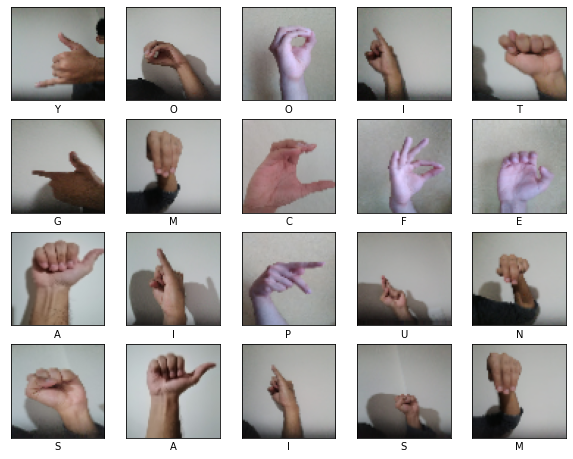

In [11]:
class_names = ['A', 'B', 'C','D', 'E',
               'F', 'G', 'H', 'I','L','M','N','O','P','R','S','T','U','V','W','Y']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs_train[i])
    plt.xlabel(class_names[int(labels_train[i])])
plt.show()


## Creating the model of cnn

In [12]:

###### Creating  the model of cnn


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))




In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [14]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(21, activation='softmax'))

In [15]:

model.compile(optimizer='adam',steps_per_execution=10000,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(imgs_train, labels_train, epochs=170, batch_size = 128,
                    validation_data=(imgs_test, labels_test),verbose = 1)

Epoch 1/170


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 4s 2s/step - loss: 3.0466 - accuracy: 0.0647 - val_loss: 3.0453 - val_accuracy: 0.0707
Epoch 2/170
2/2 [==============================] - 2s 882ms/step - loss: 3.0103 - accuracy: 0.0846 - val_loss: 3.0310 - val_accuracy: 0.0707
Epoch 3/170
2/2 [==============================] - 2s 832ms/step - loss: 2.9828 - accuracy: 0.0846 - val_loss: 3.0195 - val_accuracy: 0.1010
Epoch 4/170
2/2 [==============================] - 2s 835ms/step - loss: 2.9707 - accuracy: 0.1443 - val_loss: 3.0171 - val_accuracy: 0.1010
Epoch 5/170
2/2 [==============================] - 2s 857ms/step - loss: 2.9428 - accuracy: 0.1443 - val_loss: 3.0092 - val_accuracy: 0.1111
Epoch 6/170
2/2 [==============================] - 2s 869ms/step - loss: 2.9111 - accuracy: 0.1144 - val_loss: 2.9526 - val_accuracy: 0.1010
Epoch 7/170
2/2 [==============================] - 2s 841ms/step - loss: 2.8629 - accuracy: 0.1443 - val_loss: 2.8966 - val_accuracy: 0.1818
Epoch 8/170
2/2 [===========

4/4 - 0s - loss: 2.8023 - accuracy: 0.7475 - 202ms/epoch - 51ms/step


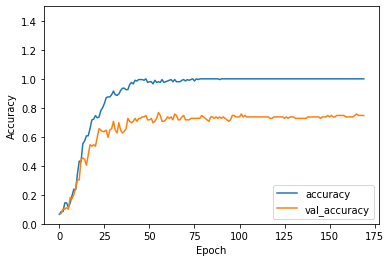

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imgs_test,  labels_test, verbose=2)

In [17]:
print(test_acc)

0.747474730014801


1/1 [==============================] - 0s 296ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1


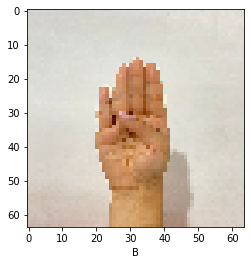

In [18]:

#img = imgs_test[10]
path_img = r'/content/gdrive/MyDrive/dataset/prediction/B.jpeg'

img = tf.keras.preprocessing.image.load_img(path_img,target_size=(64,64))

imagen = tf.keras.preprocessing.image.img_to_array(img)
imagen = imagen.astype(float) / 255
img_pil = tf.keras.preprocessing.image.array_to_img(imagen)
plt.imshow(img_pil)

img_pil = np.expand_dims(img_pil, axis=0)

resultado = model.predict(img_pil)[0]
respuesta = np.argmax(resultado)
print(resultado)
print(respuesta)

plt.xlabel(class_names[int(respuesta)])
plt.show()


## Configuration of open cv and video stream

In [19]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

### Video stream functions 

In [20]:
# JavaScript to properly create our live video stream using our webcam as input
#obtaining from: https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=ghUlAJzKSjFT 

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes




def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [25]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
dim = (64,64)
while True:


    js_reply = video_frame(label_html, bbox)


       # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    #reescale image
    
    img =  cv2.flip(img, 1)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    resized = np.reshape(resized,(1,resized.shape[0],resized.shape[1],3))


    resultado = model.predict(resized)
    respuesta = np.argmax(resultado)

    bbox_array =  cv2.putText(bbox_array,  class_names[int(respuesta)],(30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
     
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes













 

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: ignored